In [57]:
import pandas as pd

# Load the CSV file with additional parsing options
file_path = '/content/merged.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataframe to understand its structure
print(data.head())

         GKGRECORDID          DATE  \
0  20190102091500-10  2.019010e+13   
1  20190102091500-12  2.019010e+13   
2  20190102091500-28  2.019010e+13   
3  20190102091500-37  2.019010e+13   
4  20190102091500-47  2.019010e+13   

                                  DocumentIdentifier  \
0  https://www.thetowntalk.com/story/opinion/2019...   
1  https://screenrant.com/shazam-movie-trailer-co...   
2  http://www.canadianreviewer.com/cr/recommend/3...   
3  https://www.dailypolitical.com/2019/01/02/zack...   
4  https://www.havasunews.com/news/taking-it-all-...   

                                              Themes  \
0  TAX_FNCACT;TAX_FNCACT_MAN;WB_1406_DISEASES;WB_...   
1  TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_HUMAN;TAX_FN...   
2  TAX_FNCACT;TAX_FNCACT_PRINCE;TAX_FNCACT_CROWN_...   
3  TAX_FNCACT;TAX_FNCACT_ANALYSTS;TAX_FNCACT_ANAL...   
4  TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_MOHAVE;T...   

                                            V2Themes  \
0  KILL,911;KILL,2335;KILL,3823;KILL,4935

In [58]:
data = data.dropna(subset=['DATE'])

In [59]:
data['DATE'] = data['DATE'].astype(str).str[:8].astype(int)

In [84]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%Y')

In [85]:
data.head()

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,FinalThemes
0,20190102091500-10,2019-01-02,https://www.thetowntalk.com/story/opinion/2019...,TAX_FNCACT;TAX_FNCACT_MAN;WB_1406_DISEASES;WB_...,"KILL,911;KILL,2335;KILL,3823;KILL,4935;KILL,50...",1#United States#US#US#39.828175#-98.5795#US;3#...,1#America#US#US##39.828175#-98.5795#US#210;3#H...,['facebook inc'],"Ohio Department Of Mental Health,3576;Facebook...",-2.657807,"SECURITY_SERVICES,GENERAL_HEALTH,MEDICAL,LEGIS..."
1,20190102091500-12,2019-01-02,https://screenrant.com/shazam-movie-trailer-co...,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_HUMAN;TAX_FN...,"TAX_FNCACT_HERO,267;TAX_FNCACT_HERO,2541;TAX_E...",1#France#FR#FR#46#2#FR;1#Brazil#BR#BR#-10#-55#BR,1#French#FR#FR##46#2#FR#1350;1#Brazil#BR#BR##-...,['twitter inc'],"Warner Bros,414;Warner Bros,517;Warner Bros,68...",2.165354,"GENERAL_HEALTH,MEDICAL,TAX_ETHNICITY"
2,20190102091500-28,2019-01-02,http://www.canadianreviewer.com/cr/recommend/3...,TAX_FNCACT;TAX_FNCACT_PRINCE;TAX_FNCACT_CROWN_...,"GENERAL_GOVERNMENT,131;GENERAL_GOVERNMENT,509;...","1#Saudi Arabia#SA#SA#25#45#SA;3#Washington, Wa...",1#Saudi Arabia#SA#SA##25#45#SA#120;1#Saudi Ara...,['netflix inc'],"Youtube,946;Youtube,1048;Netflix,570",-0.549451,"GENERAL_GOVERNMENT,CYBER_ATTACK,LEGISLATION"
3,20190102091500-37,2019-01-02,https://www.dailypolitical.com/2019/01/02/zack...,TAX_FNCACT;TAX_FNCACT_ANALYSTS;TAX_FNCACT_ANAL...,"GENERAL_GOVERNMENT,4343;EPU_POLICY_GOVERNMENT,...",1#United States#US#US#39.828175#-98.5795#US,1#United States#US#US##39.828175#-98.5795#US#4187,"['morgan stanley', 'centene corp', 'centene co...","Specialty Services,4255;Morgan Stanley,2059;Za...",1.769912,"TAX_DISEASE,MEDICAL,GENERAL_HEALTH,GENERAL_GOV..."
4,20190102091500-47,2019-01-02,https://www.havasunews.com/news/taking-it-all-...,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_MOHAVE;T...,"TAX_FNCACT_VOLUNTEER,442;EPU_ECONOMY_HISTORIC,...","2#Montana, United States#US#USMT#46.9048#-110....","2#Montana, United States#US#USMT##46.9048#-110...",['national geographic partners'],"National Geographic,794;American Hiking Societ...",5.839416,TAX_ETHNICITY


In [88]:
filtered_data = data[
    (data['Organizations'].str.contains('Tesla', case=False, na=False)) |
    (data['V2Organizations'].str.contains('Tesla', case=False, na=False))
]

In [90]:
stats = filtered_data['V2Tone'].describe()
stats

count    519.000000
mean      -0.475476
std        2.101306
min       -9.558824
25%       -1.722510
50%       -0.414938
75%        0.872221
max        9.090909
Name: V2Tone, dtype: float64

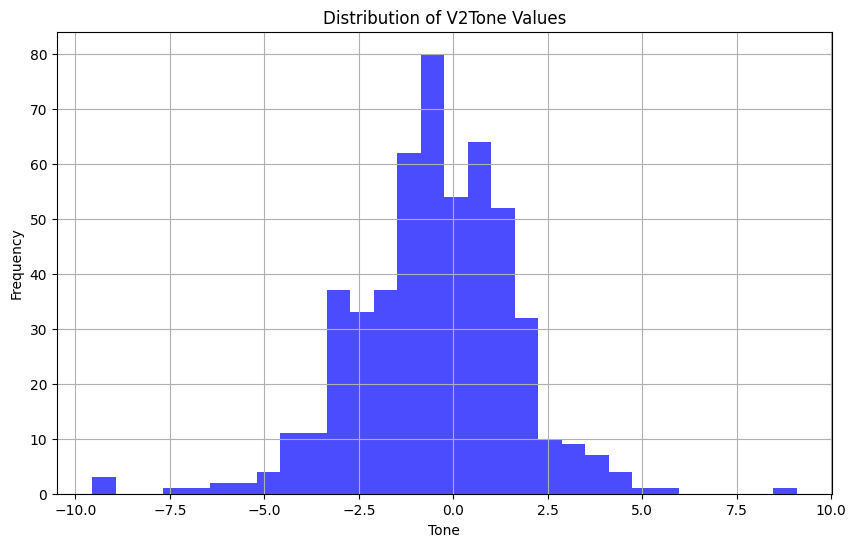

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['V2Tone'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of V2Tone Values')
plt.xlabel('Tone')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

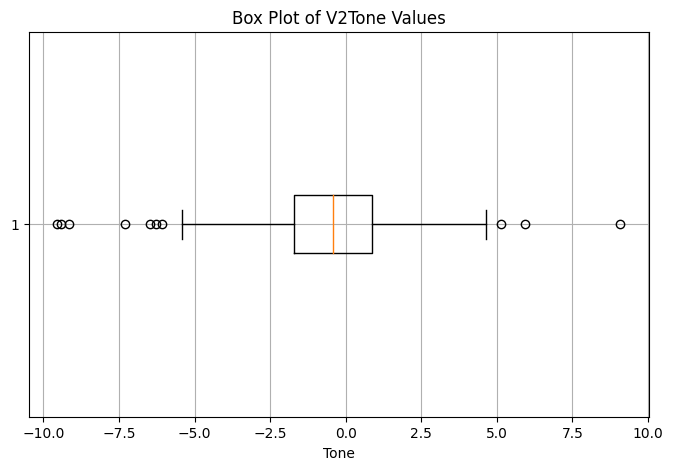

In [93]:
plt.figure(figsize=(8, 5))
plt.boxplot(filtered_data['V2Tone'].dropna(), vert=False)
plt.title('Box Plot of V2Tone Values')
plt.xlabel('Tone')
plt.grid(True)
plt.show()

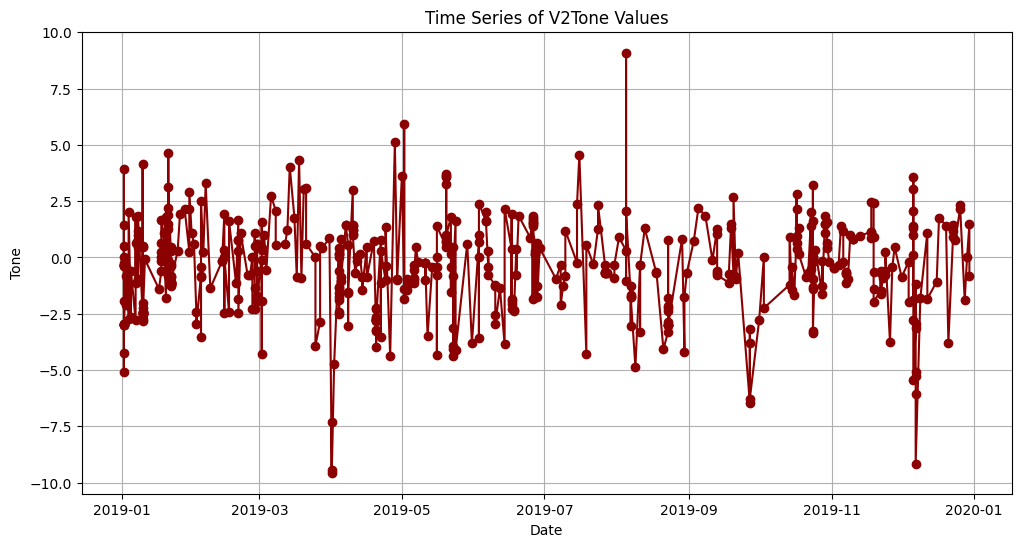

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['V2Tone'], marker='o', linestyle='-', color='darkred')
plt.title('Time Series of V2Tone Values')
plt.xlabel('Date')
plt.ylabel('Tone')
plt.grid(True)
plt.show()

In [96]:
unique_themes = filtered_data['FinalThemes'].unique()
print("Unique Themes in 'FinalThemes':")
print(unique_themes)

Unique Themes in 'FinalThemes':
['MANMADE_DISASTER_IMPLIED,ECON_TAXATION' 'ENV_SOLAR,ECON_TAXATION'
 'ECON_TAXATION,GENERAL_GOVERNMENT,TAX_ETHNICITY'
 'ENV_SOLAR,ECON_TAXATION,ECON_STOCKMARKET,ECON_DEBT'
 'ECON_STOCKMARKET,GENERAL_GOVERNMENT,MEDICAL,MANMADE_DISASTER_IMPLIED,ARMEDCONFLICT,ECON_TRADE_DISPUTE,TAX_ETHNICITY,TAX_DISEASE,ENV_OIL,ECON_DEBT,BORDER,ECON_TAXATION'
 'ECON_STOCKMARKET,ENV_OIL,MANMADE_DISASTER_IMPLIED,ARMEDCONFLICT,ECON_TRADE_DISPUTE,MEDICAL,ECON_HOUSING_PRICES,GENERAL_GOVERNMENT,BORDER,ECON_INTEREST_RATES,ECON_TAXATION'
 'ARMEDCONFLICT,ECON_TRADE_DISPUTE,ECON_STOCKMARKET,GENERAL_HEALTH,MEDICAL,MANMADE_DISASTER_IMPLIED'
 'ECON_STOCKMARKET,ECON_TAXATION'
 'MANMADE_DISASTER_IMPLIED,ECON_TAXATION,ECON_STOCKMARKET,GENERAL_GOVERNMENT,TAX_ETHNICITY'
 'ECON_STOCKMARKET,GENERAL_HEALTH,MEDICAL,ECON_TRADE_DISPUTE,GEN_HOLIDAY,TAX_DISEASE,MANMADE_DISASTER_IMPLIED,ENV_SOLAR,GENERAL_GOVERNMENT,DEMOCRACY,TAX_TERROR_GROUP,TAX_ETHNICITY,KILL,ENV_NATURALGAS'
 'ECON_TAXATION,ECON_STO

In [97]:
theme_series = filtered_data['FinalThemes'].str.split(',', expand=True).stack()
theme_counts = theme_series.value_counts()

# Get the top 10 themes
top_10_themes = theme_counts.head(10)

print("Top 10 Themes and Their Counts:")
print(top_10_themes)

Top 10 Themes and Their Counts:
TAX_ETHNICITY               211
ECON_STOCKMARKET            199
MANMADE_DISASTER_IMPLIED    163
GENERAL_GOVERNMENT          120
TRIAL                        80
ARMEDCONFLICT                63
ENV_SOLAR                    61
ECON_TAXATION                55
ECON_TRADE_DISPUTE           54
EDUCATION                    53
Name: count, dtype: int64


**-----------------------Index Price--------------------------------**

In [120]:
df = pd.read_csv('/content/Lithium Carbonate 99%Min China Spot Historical Data (5) (1).csv')

In [121]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/19/2024,"109,500.00","109,500.00","111,000.00","108,000.00",NaN,0.00%
1,04/18/2024,"109,500.00","109,500.00","111,000.00","108,000.00",NaN,0.00%
2,04/17/2024,"109,500.00","109,500.00","111,000.00","108,000.00",NaN,0.00%
3,04/16/2024,"109,500.00","109,500.00","111,000.00","108,000.00",NaN,0.00%
4,04/15/2024,"109,500.00","109,500.00","111,000.00","108,000.00",NaN,0.00%


Define significant price events based on sigma levels (3 sigma, 4 sigma, and 5 sigma events):

**3 Sigma Event:** Daily return exceeds the mean return by ±3 standard deviations. (3 Sigma Event: A day when the return is either 3 times the standard deviation above or below the mean return.)

**4 Sigma Event:** Daily return exceeds the mean return by ±4 standard deviations.

**5 Sigma Event:** Daily return exceeds the mean return by ±5 standard deviations.

In [122]:
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Calculate daily returns as the percentage change from the previous day
df['Daily Return'] = df['Price'].pct_change() * 100

# Calculate mean and standard deviation of daily returns
mean_return = df['Daily Return'].mean()
std_dev_return = df['Daily Return'].std()

# Calculate thresholds for sigma events
thresholds = {
    '3_sigma': (mean_return + 3*std_dev_return, mean_return - 3*std_dev_return),
    '4_sigma': (mean_return + 4*std_dev_return, mean_return - 4*std_dev_return),
    '5_sigma': (mean_return + 5*std_dev_return, mean_return - 5*std_dev_return)
}

# Identify sigma events
for key, (upper, lower) in thresholds.items():
    df[key] = df['Daily Return'].apply(lambda x: 'Yes' if x > upper or x < lower else 'No')

# Filter and display sigma events
sigma_events = df[(df['3_sigma'] == 'Yes') | (df['4_sigma'] == 'Yes') | (df['5_sigma'] == 'Yes')]
print(sigma_events[['Date', 'Daily Return', '3_sigma', '4_sigma', '5_sigma']])

            Date  Daily Return 3_sigma 4_sigma 5_sigma
88    12/05/2023      5.524862     Yes     Yes      No
89    12/04/2023      5.235602     Yes     Yes      No
90    12/01/2023      3.980100     Yes      No      No
94    11/27/2023      4.444444     Yes      No      No
138   09/14/2023      6.153846     Yes     Yes     Yes
157   08/18/2023      4.938272     Yes     Yes      No
158   08/17/2023      4.705882     Yes     Yes      No
219   05/22/2023     -5.309735     Yes     Yes      No
220   05/19/2023     -7.476636     Yes     Yes     Yes
221   05/18/2023     -6.060606     Yes     Yes     Yes
222   05/17/2023     -5.591398     Yes     Yes      No
223   05/16/2023     -4.555809     Yes     Yes      No
224   05/15/2023     -4.773270     Yes     Yes      No
225   05/12/2023     -5.012531     Yes     Yes      No
230   05/05/2023     -5.157593     Yes     Yes      No
267   03/09/2023      3.502627     Yes      No      No
611   09/24/2021     -3.614458     Yes      No      No
614   09/1

In [123]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [124]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Daily Return,3_sigma,4_sigma,5_sigma
0,2024-04-19,109500.0,"109,500.00","111,000.00","108,000.00",NaN,0.00%,NaN,No,No,No
1,2024-04-18,109500.0,"109,500.00","111,000.00","108,000.00",NaN,0.00%,0.0,No,No,No
2,2024-04-17,109500.0,"109,500.00","111,000.00","108,000.00",NaN,0.00%,0.0,No,No,No
3,2024-04-16,109500.0,"109,500.00","111,000.00","108,000.00",NaN,0.00%,0.0,No,No,No
4,2024-04-15,109500.0,"109,500.00","111,000.00","108,000.00",NaN,0.00%,0.0,No,No,No


**-----------------------merged data----------------------**

In [125]:
merged_data = pd.merge(data, df[['Date', '3_sigma', '4_sigma', '5_sigma']], left_on='DATE', right_on='Date', how='left')

print(merged_data)

                GKGRECORDID       DATE  \
0         20190102091500-10 2019-01-02   
1         20190102091500-12 2019-01-02   
2         20190102091500-28 2019-01-02   
3         20190102091500-37 2019-01-02   
4         20190102091500-47 2019-01-02   
...                     ...        ...   
213570  20191231121500-1151 2019-12-31   
213571  20191231121500-1156 2019-12-31   
213572  20191231121500-1161 2019-12-31   
213573  20191231121500-1182 2019-12-31   
213574  20191231121500-1233 2019-12-31   

                                       DocumentIdentifier  \
0       https://www.thetowntalk.com/story/opinion/2019...   
1       https://screenrant.com/shazam-movie-trailer-co...   
2       http://www.canadianreviewer.com/cr/recommend/3...   
3       https://www.dailypolitical.com/2019/01/02/zack...   
4       https://www.havasunews.com/news/taking-it-all-...   
...                                                   ...   
213570  https://www.lse.co.uk/news/uk-top-news-summary...   
213571 

In [106]:
lithium_docs = merged_data[merged_data['DocumentIdentifier'].str.contains('lithium', case=False, na=False)]

# Display the filtered data
print("Entries with 'lithium' in DocumentIdentifier:")
print(lithium_docs[['DocumentIdentifier', 'V2Tone']])

Entries with 'lithium' in DocumentIdentifier:
                                       DocumentIdentifier    V2Tone
11663   https://www.euronews.com/2019/01/20/berkshires...  1.796407
11851   https://www.reuters.com/article/us-berkshire-l...  2.173913
12079   https://www.businesswire.com/news/home/2019012...  1.474926
12231   https://www.marketwatch.com/press-release/the-...  1.243781
13629   https://www.euroinvestor.com/news/2019/01/22/q... -0.095785
16426   https://www.japantimes.co.jp/news/2019/01/29/b... -0.331950
23844   https://www.fool.com.au/2019/02/11/is-there-st... -2.555366
27886   https://www.prnewswire.com:443/news-releases/c... -0.387297
36950   https://www.torontotelegraph.com/news/25978071... -2.595156
38763   https://menafn.com/1098217322/Lithium-Power-In...  0.731707
42443   https://menafn.com/1098252086/Nano-One-Adds-An...  1.644399
58372   https://uk.reuters.com/article/us-usa-lithium-...  0.831601
70762   https://www.marketwatch.com/press-release/lith...  0.000000
70

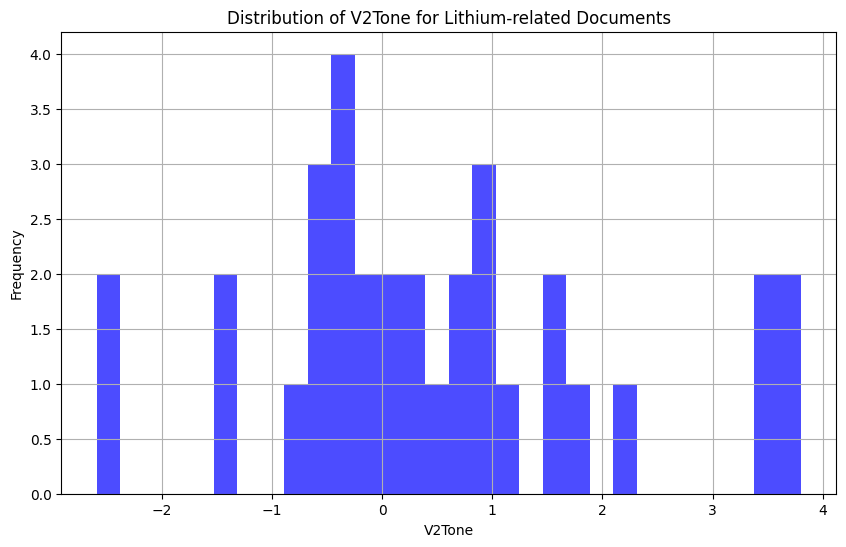

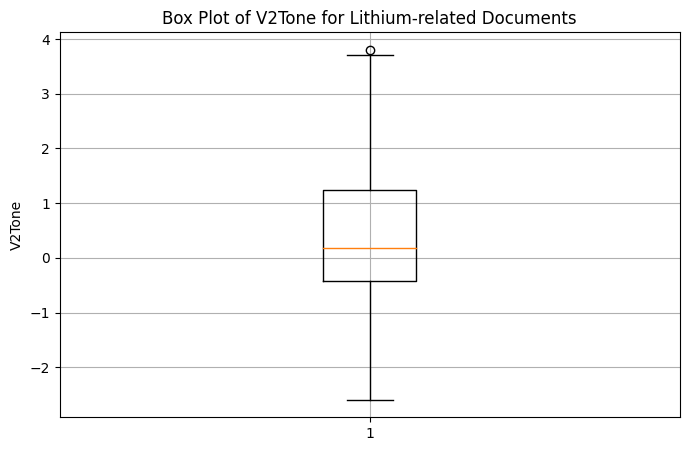

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(lithium_docs['V2Tone'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of V2Tone for Lithium-related Documents')
plt.xlabel('V2Tone')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the box plot for V2Tone values
plt.figure(figsize=(8, 5))
plt.boxplot(lithium_docs['V2Tone'].dropna(), vert=True)
plt.title('Box Plot of V2Tone for Lithium-related Documents')
plt.ylabel('V2Tone')
plt.grid(True)
plt.show()

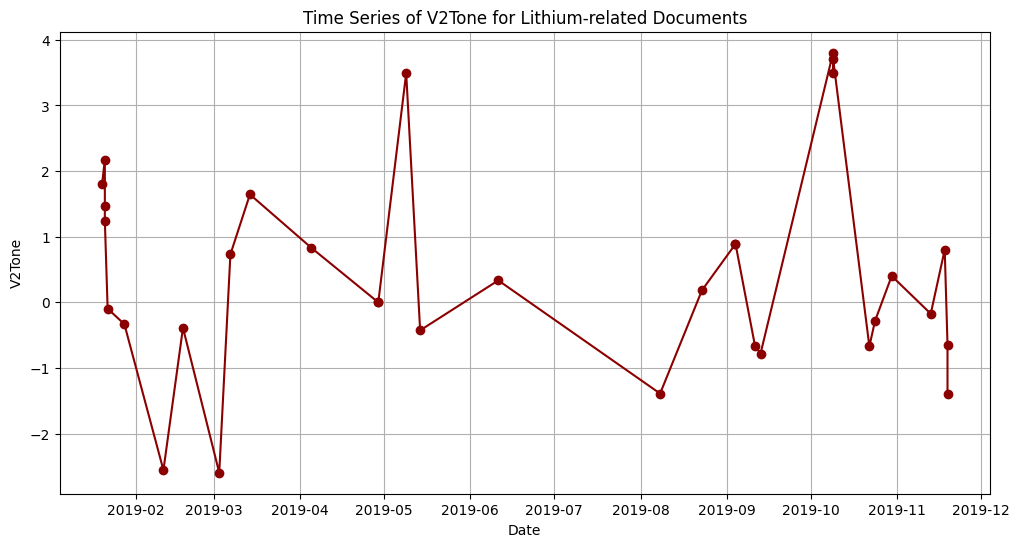

In [108]:
lithium_docs = lithium_docs.sort_values('DATE')

plt.figure(figsize=(12, 6))
plt.plot(lithium_docs['DATE'], lithium_docs['V2Tone'], marker='o', linestyle='-', color='darkred')
plt.title('Time Series of V2Tone for Lithium-related Documents')
plt.xlabel('Date')
plt.ylabel('V2Tone')
plt.grid(True)
plt.show()

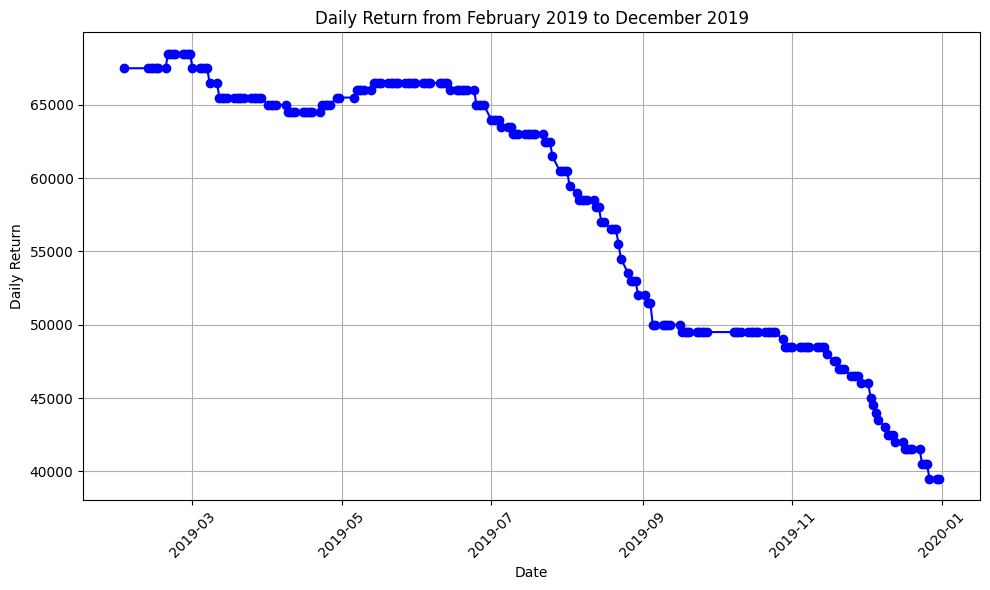

In [110]:
filtered_df = df[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-12-31')]

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Date'], filtered_df['Price'], marker='o', linestyle='-', color='blue')
plt.title('Daily Return from February 2019 to December 2019')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [126]:
merged_data['3_sigma'] = merged_data['3_sigma'].map({'Yes': 1, 'No': 0})
merged_data['4_sigma'] = merged_data['4_sigma'].map({'Yes': 1, 'No': 0})
merged_data['5_sigma'] = merged_data['5_sigma'].map({'Yes': 1, 'No': 0})


merged_data.head()

,GKGRECORDID,DATE,DocumentIdentifier,Themes,V2Themes,Locations,V2Locations,Organizations,V2Organizations,V2Tone,FinalThemes,Date,3_sigma,4_sigma,5_sigma
0,20190102091500-10,2019-01-02,https://www.thetowntalk.com/story/opinion/2019...,TAX_FNCACT;TAX_FNCACT_MAN;WB_1406_DISEASES;WB_...,"KILL,911;KILL,2335;KILL,3823;KILL,4935;KILL,50...",1#United States#US#US#39.828175#-98.5795#US;3#...,1#America#US#US##39.828175#-98.5795#US#210;3#H...,['facebook inc'],"Ohio Department Of Mental Health,3576;Facebook...",-2.657807,"SECURITY_SERVICES,GENERAL_HEALTH,MEDICAL,LEGIS...",2019-01-02,0.0,0.0,0.0
1,20190102091500-12,2019-01-02,https://screenrant.com/shazam-movie-trailer-co...,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_HUMAN;TAX_FN...,"TAX_FNCACT_HERO,267;TAX_FNCACT_HERO,2541;TAX_E...",1#France#FR#FR#46#2#FR;1#Brazil#BR#BR#-10#-55#BR,1#French#FR#FR##46#2#FR#1350;1#Brazil#BR#BR##-...,['twitter inc'],"Warner Bros,414;Warner Bros,517;Warner Bros,68...",2.165354,"GENERAL_HEALTH,MEDICAL,TAX_ETHNICITY",2019-01-02,0.0,0.0,0.0
2,20190102091500-28,2019-01-02,http://www.canadianreviewer.com/cr/recommend/3...,TAX_FNCACT;TAX_FNCACT_PRINCE;TAX_FNCACT_CROWN_...,"GENERAL_GOVERNMENT,131;GENERAL_GOVERNMENT,509;...","1#Saudi Arabia#SA#SA#25#45#SA;3#Washington, Wa...",1#Saudi Arabia#SA#SA##25#45#SA#120;1#Saudi Ara...,['netflix inc'],"Youtube,946;Youtube,1048;Netflix,570",-0.549451,"GENERAL_GOVERNMENT,CYBER_ATTACK,LEGISLATION",2019-01-02,0.0,0.0,0.0
3,20190102091500-37,2019-01-02,https://www.dailypolitical.com/2019/01/02/zack...,TAX_FNCACT;TAX_FNCACT_ANALYSTS;TAX_FNCACT_ANAL...,"GENERAL_GOVERNMENT,4343;EPU_POLICY_GOVERNMENT,...",1#United States#US#US#39.828175#-98.5795#US,1#United States#US#US##39.828175#-98.5795#US#4187,"['morgan stanley', 'centene corp', 'centene co...","Specialty Services,4255;Morgan Stanley,2059;Za...",1.769912,"TAX_DISEASE,MEDICAL,GENERAL_HEALTH,GENERAL_GOV...",2019-01-02,0.0,0.0,0.0
4,20190102091500-47,2019-01-02,https://www.havasunews.com/news/taking-it-all-...,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_MOHAVE;T...,"TAX_FNCACT_VOLUNTEER,442;EPU_ECONOMY_HISTORIC,...","2#Montana, United States#US#USMT#46.9048#-110....","2#Montana, United States#US#USMT##46.9048#-110...",['national geographic partners'],"National Geographic,794;American Hiking Societ...",5.839416,TAX_ETHNICITY,2019-01-02,0.0,0.0,0.0
